In [2]:
# Following post at http://rforwork.info/2015/05/28/an-r-enthusiast-goes-pythonic/
%matplotlib inline
import pandas as pd
import os
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from scipy import stats
from sklearn.metrics import mean_squared_error

mat_perf = pd.read_csv(os.path.expanduser('~/Downloads/student/student-mat.csv'), delimiter=';')

In [3]:
mat_perf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


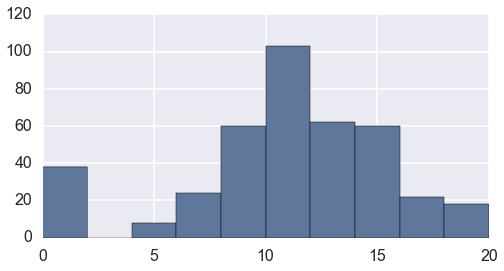

In [4]:
sns.set_palette("deep", desat=.6)
sns.set_context(context='poster', font_scale=1)
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.set_style("darkgrid")
mat_perf.G3.hist();

In [5]:
#Python Code
test_stats = {'variable': [], 'test_type' : [], 'test_value' : []}
 
for col in mat_perf.columns[:-3]:
    test_stats['variable'].append(col)
    
    if mat_perf[col].dtype == 'O':
        # Do ANOVA
        aov = smf.ols(formula='G3 ~ C(' + col + ')', data=mat_perf, missing='drop').fit()
        test_stats['test_type'].append('F Test')
        test_stats['test_value'].append(round(aov.fvalue,2))
    else:
        # Do correlation
        # print(col + '\n')
        model = smf.ols(formula='G3 ~ ' + col, data=mat_perf, missing='drop').fit()
        value = round(model.tvalues[1],2)
        test_stats['test_type'].append('t Test')
        test_stats['test_value'].append(value)
        
test_stats = pd.DataFrame(test_stats)
test_stats.sort(columns='test_value', ascending=False, inplace=True)

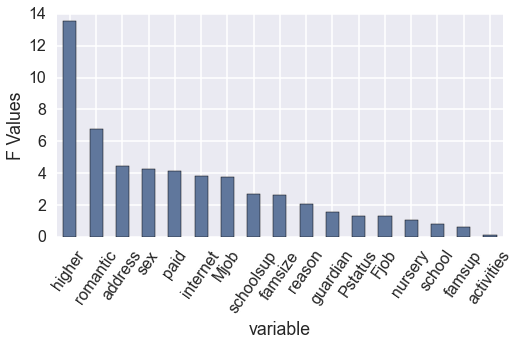

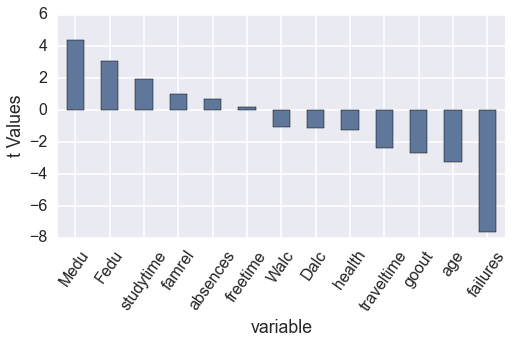

In [6]:
# Group by test type
groups = test_stats.groupby(by="test_type")

lab_to_axes = groups.plot("variable", "test_value", kind="bar", legend=False, rot=55)
for lab, ax in lab_to_axes.items():
    ax.set_ylabel(lab.replace("Test", "Values"))

In [7]:

groups.get_group("F Test")
groups.groups

{'F Test': [20, 22, 3, 1, 17, 21, 8, 15, 4, 10, 11, 5, 9, 19, 0, 16, 18],
 't Test': [6, 7, 13, 23, 29, 24, 27, 26, 28, 12, 25, 2, 14]}

In [8]:
#Python code
usevars =  [x for x in test_stats.variable[test_stats.test_value.map(lambda z: abs(z)) <= 50]]

mat_perf['randu'] = np.array([np.random.uniform(0,1) for x in range(0,mat_perf.shape[0])])
 
mp_X = mat_perf[usevars]
mp_X_train = mp_X[mat_perf.randu <= .67]
mp_X_test = mp_X[mat_perf.randu > .67]
 
mp_Y_train = mat_perf.G3[mat_perf.randu <= .67]
mp_Y_test = mat_perf.G3[mat_perf.randu > .67]

def get_dummies(ser):
    vals = ser.unique().tolist()
    print(vals)
    return ser.map(lambda s: vals.index(s))


['yes', 'no']
['no', 'yes']
['U', 'R']
['F', 'M']
['no', 'yes']
['no', 'yes']
['at_home', 'services', 'other', 'teacher', 'health']
['yes', 'no']
['GT3', 'LE3']
['course', 'reputation', 'home', 'other']
['mother', 'father', 'other']
['A', 'T']
['teacher', 'other', 'health', 'services', 'at_home']
['yes', 'no']
['GP', 'MS']
['no', 'yes']
['no', 'yes']
['yes', 'no']

/Users/huziy/virtualenvs/py3.4-default/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/huziy/virtualenvs/py3.4-default/lib/python3.4/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



['no', 'yes']
['U', 'R']
['F', 'M']
['yes', 'no']
['yes', 'no']
['at_home', 'health', 'other', 'services', 'teacher']
['yes', 'no']
['LE3', 'GT3']
['other', 'home', 'reputation', 'course']
['mother', 'father', 'other']
['T', 'A']
['other', 'services', 'at_home', 'teacher', 'health']
['yes', 'no']
['GP', 'MS']
['no', 'yes']
['no', 'yes']

/Users/huziy/virtualenvs/py3.4-default/lib/python3.4/site-packages/IPython/kernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/huziy/virtualenvs/py3.4-default/lib/python3.4/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



r squared value of 0.347015760782
RMSE of 3.72195986261


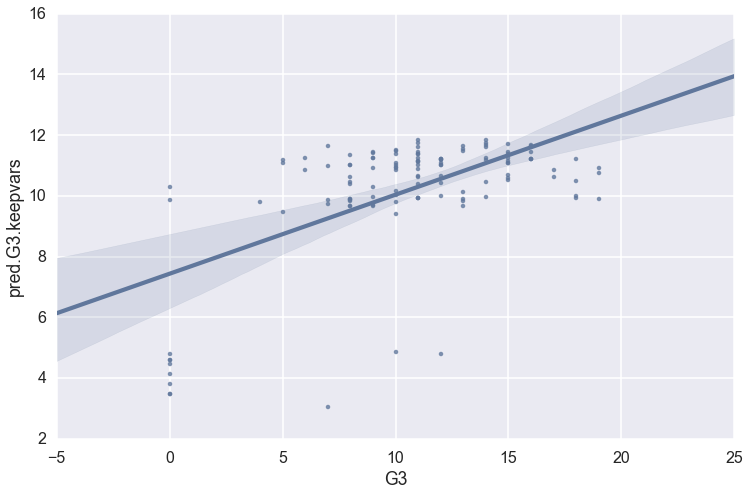

In [9]:
# for the training set
cat_cols = [x for x in mp_X_train.columns if mp_X_train[x].dtype == "O"]
for col in cat_cols:
    mp_X_train[col + '_num'] = get_dummies(mp_X_train[col])


# for the testing set
cat_cols = [x for x in mp_X_test.columns if mp_X_test[x].dtype == "O"]
for col in cat_cols:
    mp_X_test[col + '_num'] = get_dummies(mp_X_test[col])
    
mp_X_train.drop(cat_cols, inplace=True, axis=1)
mp_X_test.drop(cat_cols, inplace=True, axis=1)
 
rf = RandomForestRegressor(bootstrap=True,
           criterion='mse', max_depth=2, max_features='auto',
           min_samples_leaf=1, min_samples_split=2,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0)
rf.fit(mp_X_train, mp_Y_train)

#Python Code
y_pred = rf.predict(mp_X_test)
first_test = pd.DataFrame({"pred.G3.keepvars" : y_pred, "G3" : mp_Y_test})
sns.lmplot("G3", "pred.G3.keepvars", first_test, size=7, aspect=1.5)
print('r squared value of', stats.pearsonr(mp_Y_test, y_pred)[0]**2)
print('RMSE of', np.sqrt(mean_squared_error(mp_Y_test, y_pred)))

In [262]:
cat_cols

['higher',
 'romantic',
 'address',
 'sex',
 'paid',
 'internet',
 'Mjob',
 'schoolsup',
 'famsize',
 'reason',
 'guardian',
 'Pstatus',
 'Fjob',
 'nursery',
 'school',
 'famsup',
 'activities']

In [231]:
mat_perf.Fjob.dtype

dtype('O')

In [229]:
mat_perf["Fedu"].dtype == "O"

False

In [230]:
mp_X.columns

Index(['schoolsup', 'famsize', 'reason', 'studytime', 'guardian', 'Pstatus', 'Fjob', 'nursery', 'famrel', 'school', 'absences', 'famsup', 'freetime', 'activities', 'Walc', 'Dalc', 'health', 'traveltime', 'goout'], dtype='object')

In [232]:
mat_perf.Fjob

0       teacher
1         other
2         other
3      services
4         other
5         other
6         other
7       teacher
8         other
9         other
10       health
11        other
12     services
13        other
14        other
15        other
16     services
17        other
18     services
19        other
20        other
21       health
22        other
23        other
24       health
25     services
26        other
27     services
28        other
29      teacher
         ...   
365       other
366    services
367    services
368    services
369     teacher
370    services
371    services
372     at_home
373       other
374       other
375       other
376       other
377    services
378       other
379       other
380     teacher
381       other
382    services
383    services
384       other
385       other
386     at_home
387       other
388    services
389       other
390    services
391    services
392       other
393       other
394     at_home
Name: Fjob, dtype: objec